# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [11]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [12]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [13]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [14]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [15]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print("Coefficients for linear regression are :\n" , beta)

# Calculate RMSE
import math
y_pred = []
for p in X_test:
    pred = beta[0] + beta[1] * p[0] 
    + beta[2] * p[1]
    + beta[3] * p[2]
    + beta[4] * p[3]
    + beta[5] * p[4]
    + beta[6] * p[5]
    + beta[7] * p[6]
    + beta[8] * p[7]
    + beta[9] * p[8]
    + beta[10] * p[9]

    y_pred.append(pred)

MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)

print(f"\nRMSE based on this fit is {RMSE:.3f}")


Coefficients for linear regression are :
 [[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]

RMSE based on this fit is 75.760


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

In [16]:
from weighted_linear_regression import w_lsq

###
# We may assume that X contains only unique data points
###

# Create train and test data
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

# Define weight array/vector 
# Currently this is a randomly initialized array of length 300 with weights between 0 and 1 (scaled)
np.random.seed(123)
d = list(np.random.random_sample(300))

# Compute coefficients
beta = w_lsq(X_train, y_train, d)

# print the parameters
print(beta)

[[ 153.19924068]
 [  35.1317123 ]
 [-272.31457235]
 [ 485.33793855]
 [ 401.29409448]
 [-746.33023335]
 [ 367.56971003]
 [ 153.55305005]
 [ 209.08141362]
 [ 752.54327571]
 [ 125.66515197]]


### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

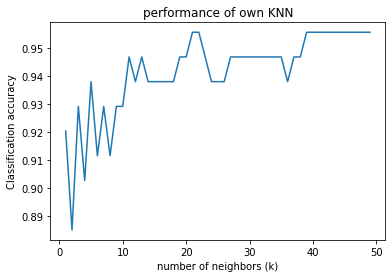

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from KNN import KNearestNeighbor

# Extract data and target from dataset
X = breast_cancer.data 
y = breast_cancer.target

# Scale X between 0 and 1
X = (X-np.min(X))/np.ptp(X)

# Manually split into train and test as we're not yet allowed to use sklearn train test split
# breast cancer dataset has 569 datapoints, 80/20 split means around 456 train points
X_train = X[:456]
y_train = breast_cancer.target[:456]
X_test = X[456:]
y_test = breast_cancer.target[456:]


accuracies = []
ks = range(1,50)
for k in ks:
    knn = KNearestNeighbor(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set( xlabel= 'number of neighbors (k)',
        ylabel= 'Classification accuracy',
        title= 'performance of own KNN')
plt.show()


### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

Text(0, 0.5, 'RMSE')

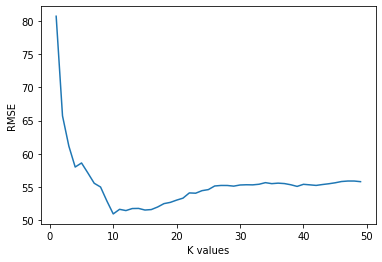

In [18]:
from KNN import KNN_regressor

# Redefine data again (no scaling)
X_train = diabetes.data[:300]
y_train = diabetes.target[:300]
X_test = diabetes.data[300:]
y_test = diabetes.target[300:]


k_list = [x for x in range(1,50,1)]
RMSE_list = []
for k in k_list:
    RMSE = KNN_regressor(X_train, X_test, y_train, y_test, k)
    RMSE_list.append(RMSE)

plt.plot(k_list, RMSE_list)
plt.xlabel("K values")
plt.ylabel("RMSE")

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



In [19]:
p_target_0 = sum(breast_cancer.target == 0) / len(breast_cancer.target)
p_target_1 = 1- p_target_0

p_target_0, p_target_1


(0.37258347978910367, 0.6274165202108963)

In [22]:
from scipy.stats import norm

def Extract(lst, idx):
    return [item[idx] for item in lst]

def conditional_probability(breast_cancer):
    idx = 0

    for feature_name in breast_cancer.feature_names:
        # Get feature data
        feature_data = np.array(Extract(breast_cancer.data, idx))
        
        # Fetch feature data for target 0 and target 1 seperately
        target_0 = []
        target_1 = []
        for i, j in zip(feature_data, breast_cancer.target):
            if j == 0:
                target_0.append(i)
            else:
                target_1.append(i)
            
        # Transform data between 0 and 1
        target_0 = (target_0-np.min(target_0))/np.ptp(target_0)
        target_1 = (target_1-np.min(target_1))/np.ptp(target_1)

        # Calculate mean and std of both
        mean_0 = np.mean(target_0)
        std_0 = np.std(target_0)
        mean_1 = np.mean(target_1)
        std_1 = np.std(target_1)

        # Create values to plot with using gaussian (normal) distribution
        x_values_0 = np.sort(np.array(target_0))
        y_values_0 = norm(mean_0, std_0)

        x_values_1 = np.sort(np.array(target_1))
        y_values_1 = norm(mean_1, std_1)

        # Calculate conditional probability 
        #TODO: Fix this stuff, I don't know how :)
        P_feature_given_target_0 = (1 * p_target_0)/(p_target_0)
        P_feature_given_target_1 = (1 * p_target_1)/(p_target_1)
        
        # Plot gaussian distributions for each feature seperately, making a distinction between target 0 and 1.
        plt.title("feature name: {}".format(feature_name))
        plt.plot(x_values_0, y_values_0.pdf(x_values_0), label='target 0');
        plt.plot(x_values_1, y_values_1.pdf(x_values_1), label='target 1');
        plt.legend()
        plt.show()
        print(f"conditional probabilities: P(X={feature_name}|Y=0) {P_feature_given_target_0}, P(X={feature_name}|Y=1) {P_feature_given_target_1}")
        
        idx+=1

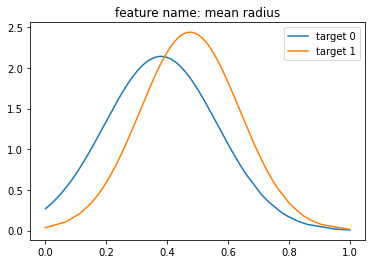

conditional probabilities: P(X=mean radius|Y=0) 1.0, P(X=mean radius|Y=1) 1.0


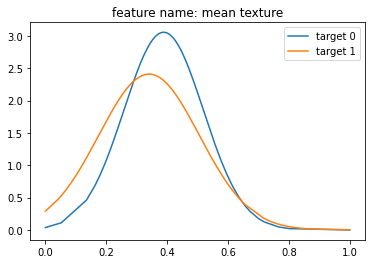

conditional probabilities: P(X=mean texture|Y=0) 1.0, P(X=mean texture|Y=1) 1.0


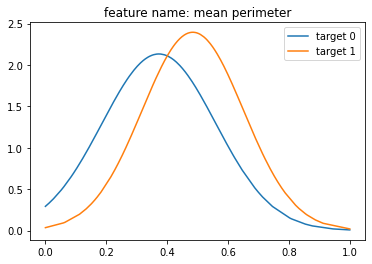

conditional probabilities: P(X=mean perimeter|Y=0) 1.0, P(X=mean perimeter|Y=1) 1.0


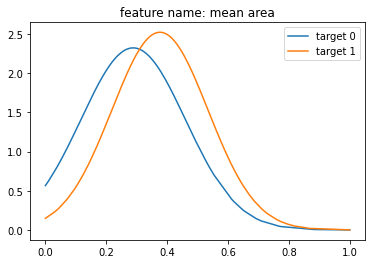

conditional probabilities: P(X=mean area|Y=0) 1.0, P(X=mean area|Y=1) 1.0


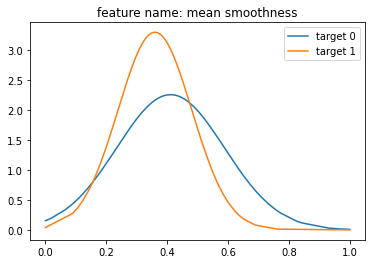

conditional probabilities: P(X=mean smoothness|Y=0) 1.0, P(X=mean smoothness|Y=1) 1.0


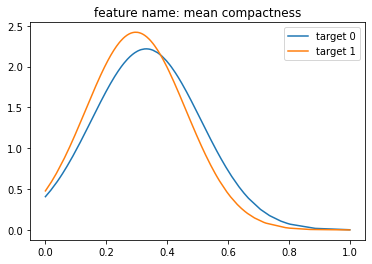

conditional probabilities: P(X=mean compactness|Y=0) 1.0, P(X=mean compactness|Y=1) 1.0


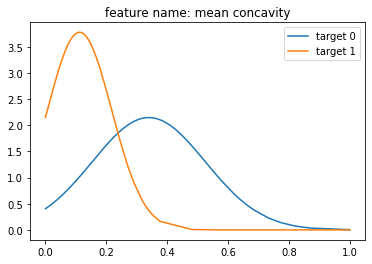

conditional probabilities: P(X=mean concavity|Y=0) 1.0, P(X=mean concavity|Y=1) 1.0


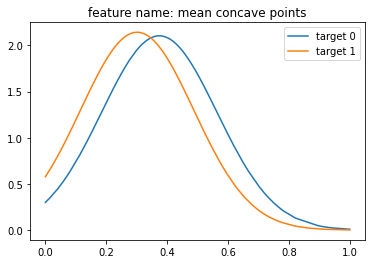

conditional probabilities: P(X=mean concave points|Y=0) 1.0, P(X=mean concave points|Y=1) 1.0


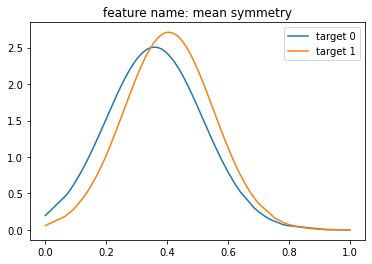

conditional probabilities: P(X=mean symmetry|Y=0) 1.0, P(X=mean symmetry|Y=1) 1.0


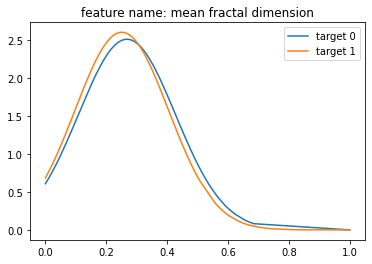

conditional probabilities: P(X=mean fractal dimension|Y=0) 1.0, P(X=mean fractal dimension|Y=1) 1.0


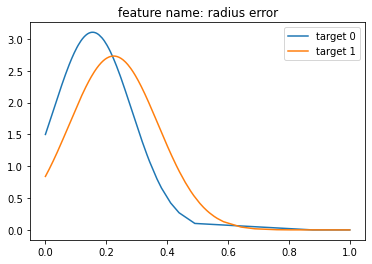

conditional probabilities: P(X=radius error|Y=0) 1.0, P(X=radius error|Y=1) 1.0


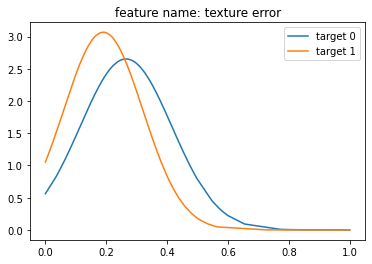

conditional probabilities: P(X=texture error|Y=0) 1.0, P(X=texture error|Y=1) 1.0


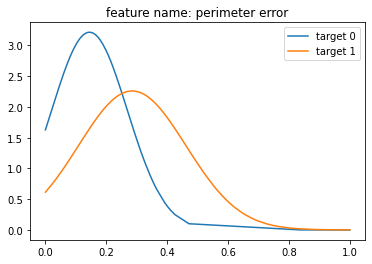

conditional probabilities: P(X=perimeter error|Y=0) 1.0, P(X=perimeter error|Y=1) 1.0


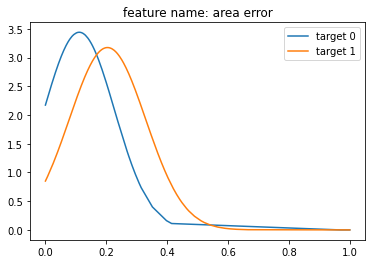

conditional probabilities: P(X=area error|Y=0) 1.0, P(X=area error|Y=1) 1.0


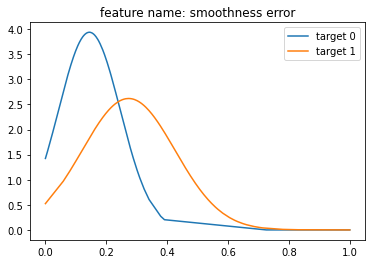

conditional probabilities: P(X=smoothness error|Y=0) 1.0, P(X=smoothness error|Y=1) 1.0


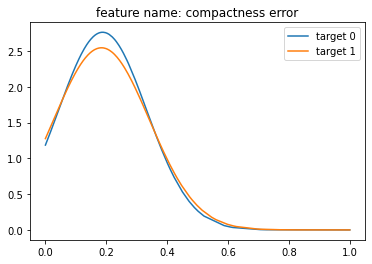

conditional probabilities: P(X=compactness error|Y=0) 1.0, P(X=compactness error|Y=1) 1.0


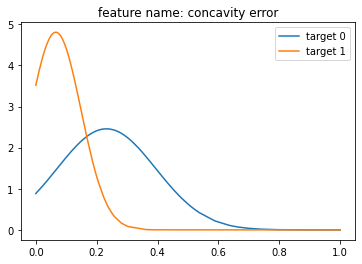

conditional probabilities: P(X=concavity error|Y=0) 1.0, P(X=concavity error|Y=1) 1.0


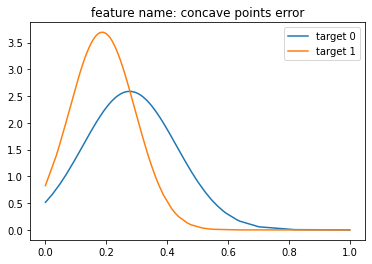

conditional probabilities: P(X=concave points error|Y=0) 1.0, P(X=concave points error|Y=1) 1.0


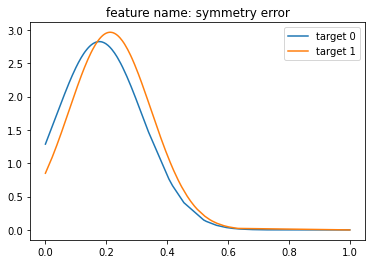

conditional probabilities: P(X=symmetry error|Y=0) 1.0, P(X=symmetry error|Y=1) 1.0


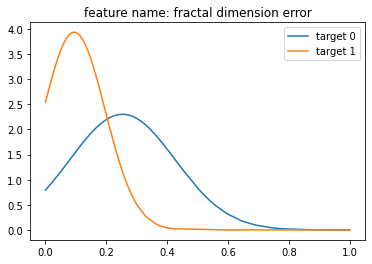

conditional probabilities: P(X=fractal dimension error|Y=0) 1.0, P(X=fractal dimension error|Y=1) 1.0


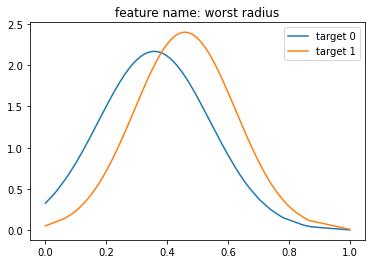

conditional probabilities: P(X=worst radius|Y=0) 1.0, P(X=worst radius|Y=1) 1.0


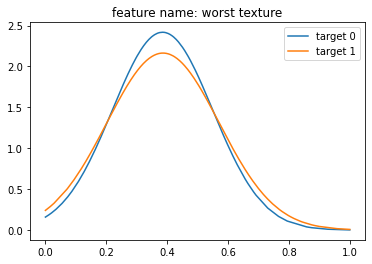

conditional probabilities: P(X=worst texture|Y=0) 1.0, P(X=worst texture|Y=1) 1.0


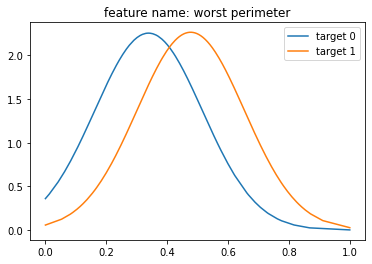

conditional probabilities: P(X=worst perimeter|Y=0) 1.0, P(X=worst perimeter|Y=1) 1.0


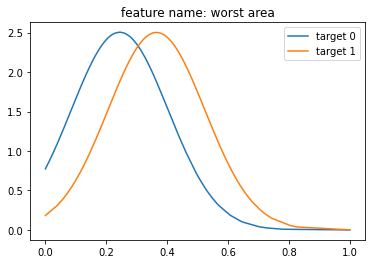

conditional probabilities: P(X=worst area|Y=0) 1.0, P(X=worst area|Y=1) 1.0


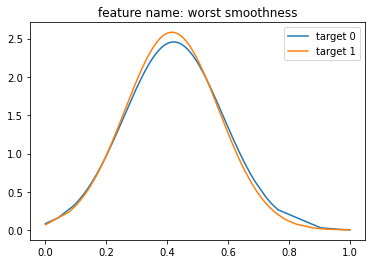

conditional probabilities: P(X=worst smoothness|Y=0) 1.0, P(X=worst smoothness|Y=1) 1.0


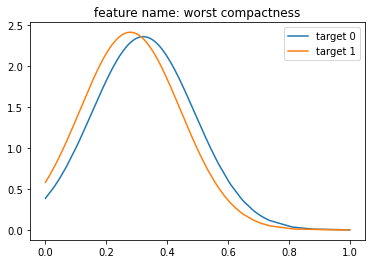

conditional probabilities: P(X=worst compactness|Y=0) 1.0, P(X=worst compactness|Y=1) 1.0


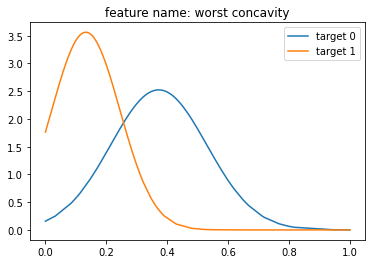

conditional probabilities: P(X=worst concavity|Y=0) 1.0, P(X=worst concavity|Y=1) 1.0


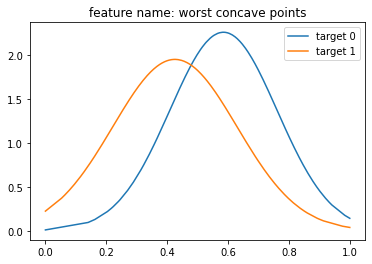

conditional probabilities: P(X=worst concave points|Y=0) 1.0, P(X=worst concave points|Y=1) 1.0


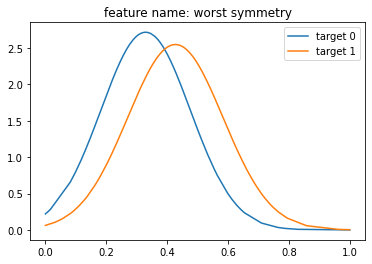

conditional probabilities: P(X=worst symmetry|Y=0) 1.0, P(X=worst symmetry|Y=1) 1.0


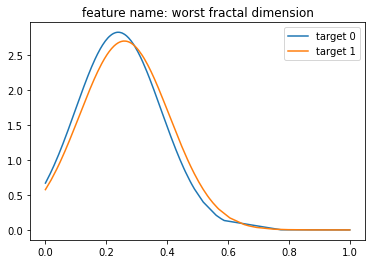

conditional probabilities: P(X=worst fractal dimension|Y=0) 1.0, P(X=worst fractal dimension|Y=1) 1.0


In [23]:
conditional_probability(breast_cancer)